In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats

from scipy.stats import spearmanr,pointbiserialr  # for Spearman Correlation and Biserial
from statsmodels.stats.stattools import durbin_watson
from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import anderson, norm, uniform
from skgof import cvm_test, ks_test
import statsmodels.stats.diagnostic as sm_diagnostic

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\user\Miniconda3\lib\site-packages\skgof\ecdfgof.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from .cvmdist import cvm_unif


In [1]:
#This is the firsy data set with data about temperature, fog precence, wind speed and precipitation

In [2]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\temperature_data.csv")
df = data.copy()


In [3]:
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


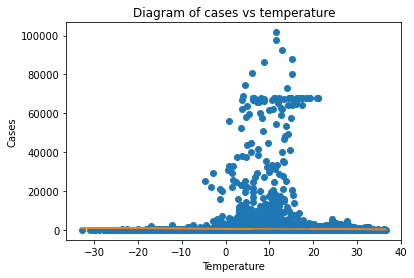

In [8]:
xi = df.Temperature
y = df.Cumulative_cases
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

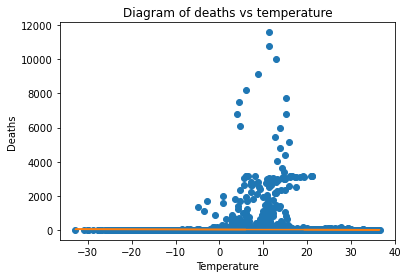

In [9]:
xi = df.Temperature
y = df.Cumulative_death
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Deaths")
plt.title('Diagram of deaths vs temperature')
ax = plt.gca()
fig = plt.gcf()

In [6]:
#Covariance

In [4]:
df.Temperature.cov(df.Cumulative_cases)

-1586.9217184185782

In [5]:
df.Temperature.cov(df.Cumulative_death)

-54.529807901380295

In [7]:
#Correlation

In [8]:
df.Temperature.corr(df.Cumulative_cases)

-0.02983752100786207

In [9]:
df.Temperature.corr(df.Cumulative_death)

-0.016696637151717496

In [10]:
#Spearman correlation

In [11]:
spearmanr(df.Cumulative_cases,df.Temperature)

SpearmanrResult(correlation=-0.10969605543200833, pvalue=2.3875823081976858e-55)

In [12]:
spearmanr(df.Cumulative_death,df.Temperature)

SpearmanrResult(correlation=-0.08949692008850194, pvalue=2.3374329911646687e-37)

In [18]:
#Pearson correlation

In [14]:
from scipy.stats import pearsonr

In [15]:
pearsonr(df.Cumulative_cases,df.Temperature)

(-0.029837521007865304, 2.131794731134829e-05)

In [16]:
pearsonr(df.Cumulative_death,df.Temperature)

(-0.016696637151714405, 0.0173964143224184)

In [19]:
#Pearson correlation
np.corrcoef(df.Temperature,df.Cumulative_cases)

array([[ 1.        , -0.02983752],
       [-0.02983752,  1.        ]])

In [20]:
#Kelndall correlation
import scipy.stats

In [21]:
scipy.stats.kendalltau(df.Temperature,df.Cumulative_cases)

KendalltauResult(correlation=-0.08089687889732562, pvalue=7.218873637713515e-56)

In [22]:
#These functions return objects that contain two values:

#The correlation coefficient
#The p-value
#You use the p-value in statistical methods when you’re testing a hypothesis. 
#The p-value is an important measure that requires in-depth knowledge
#of probability and statistics to interpret.

In [23]:
#Linear regression
#.slope: the slope of the regression line
#.intercept: the intercept of the regression line
#.pvalue: the p-value
#.stderr: the standard error of the estimated gradient

In [24]:
result = scipy.stats.linregress(df.Temperature,df.Cumulative_cases)

In [25]:
result.slope

-10.560453028353756

In [26]:
result.intercept

625.0814498435616

In [27]:
result.rvalue

-0.029837521007862067

In [28]:
 result.pvalue

2.1317947311524572e-05

In [29]:
result.stderr

2.483866175314034

In [33]:
slope, intercept, r, p, stderr = scipy.stats.linregress(df.Temperature,df.Cumulative_cases)

In [34]:
line = f'Regression line: Cumulative_cases={intercept:.2f}+{slope:.2f}Temperature, r={r:.2f}'
line 

'Regression line: Cumulative_cases=625.08+-10.56Temperature, r=-0.03'

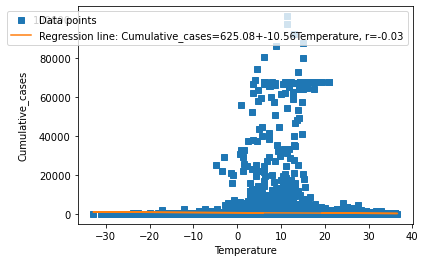

In [35]:
fig, ax = plt.subplots()
ax.plot(df.Temperature,df.Cumulative_cases , linewidth=0, marker='s', label='Data points')
ax.plot(df.Temperature, intercept + slope * df.Temperature, label=line)
ax.set_xlabel('Temperature')
ax.set_ylabel('Cumulative_cases')
ax.legend(facecolor='white')
plt.show()

In [10]:
df.corr()

,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
Cumulative_cases,1.000000,0.878909,0.645463,0.654677,0.055638,0.061438,-0.029838,-0.010954,0.009051,0.005643
Cumulative_death,0.878909,1.000000,0.592193,0.832733,0.039053,0.037158,-0.016697,-0.009460,0.005628,-0.004851
Daily_cases,0.645463,0.592193,1.000000,0.787458,0.071302,-0.002657,-0.041805,-0.007755,0.005465,0.001412
Daily_death,0.654677,0.832733,0.787458,1.000000,0.047311,0.005149,-0.021440,-0.008650,0.004904,-0.013628
Latitude,0.055638,0.039053,0.071302,0.047311,1.000000,-0.252757,-0.732168,0.083349,-0.073881,0.051949
Longitude,0.061438,0.037158,-0.002657,0.005149,-0.252757,1.000000,0.110302,-0.098196,0.051618,-0.006927
Temperature,-0.029838,-0.016697,-0.041805,-0.021440,-0.732168,0.110302,1.000000,-0.018319,0.026476,-0.094597
Wind_speed,-0.010954,-0.009460,-0.007755,-0.008650,0.083349,-0.098196,-0.018319,1.000000,0.010947,0.102751
Precipitation,0.009051,0.005628,0.005465,0.004904,-0.073881,0.051618,0.026476,0.010947,1.000000,0.197865
Fog_Presence,0.005643,-0.004851,0.001412,-0.013628,0.051949,-0.006927,-0.094597,0.102751,0.197865,1.000000


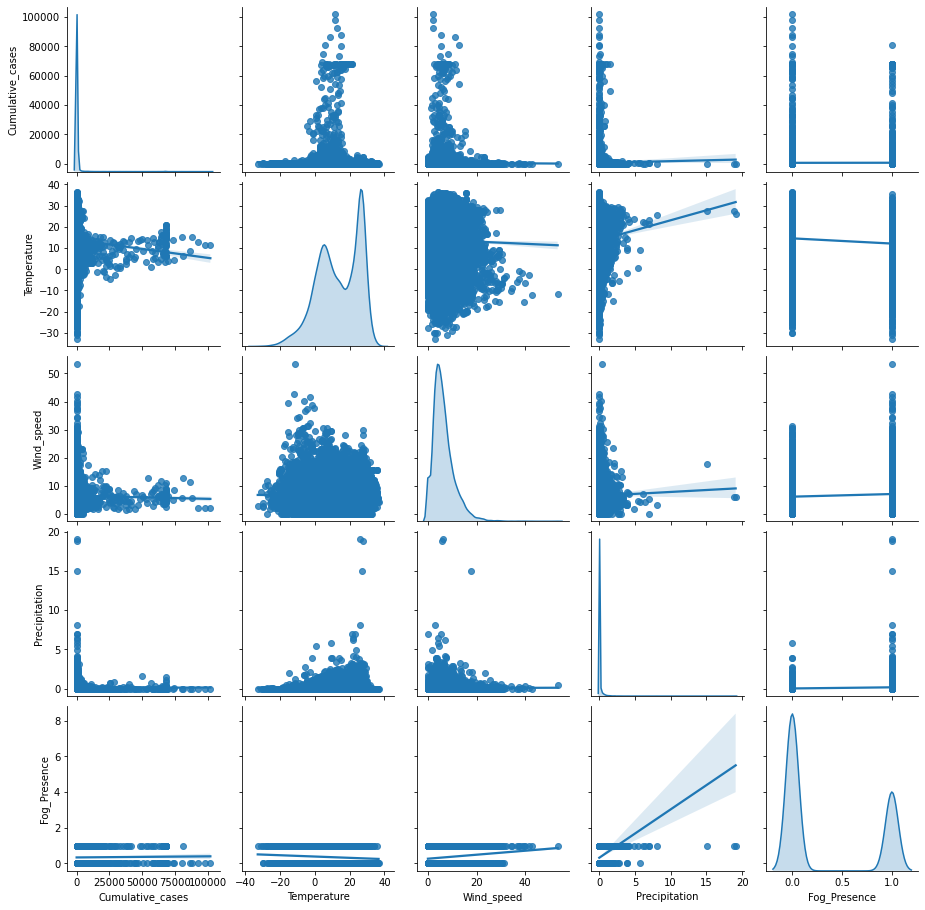

In [13]:
sns.pairplot(df, diag_kind="kde", kind="reg", vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])

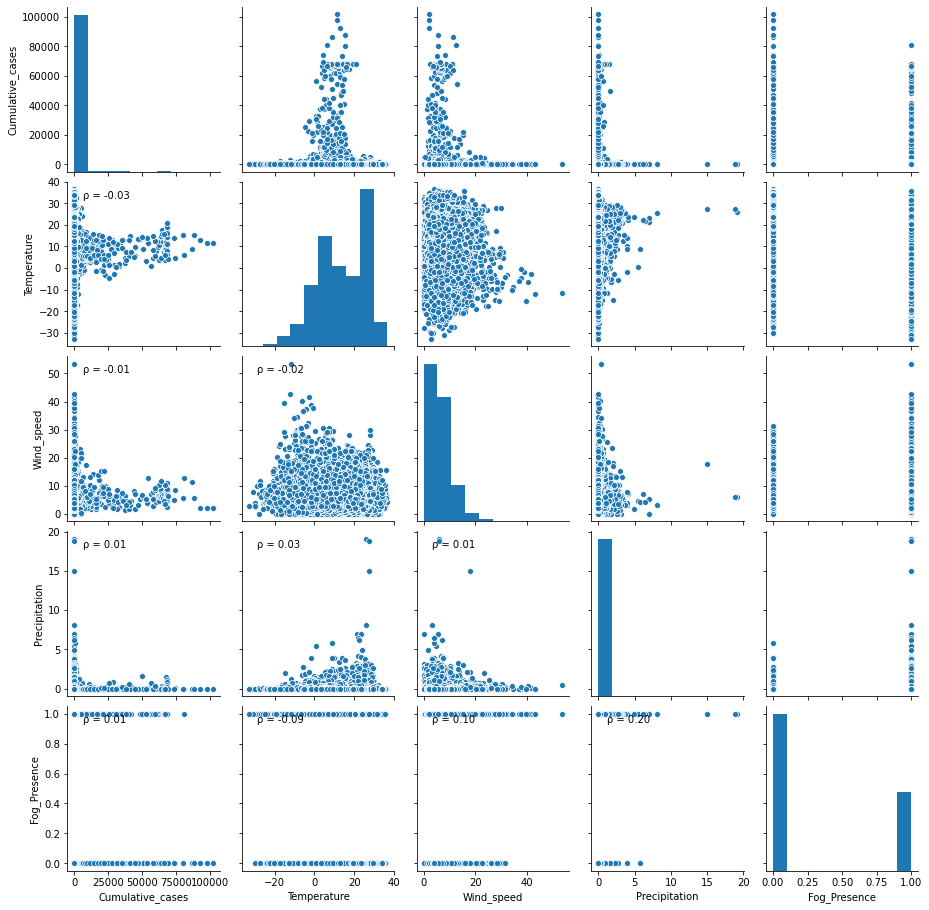

In [14]:

from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df, vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])
g.map_lower(corrfunc)
plt.show()

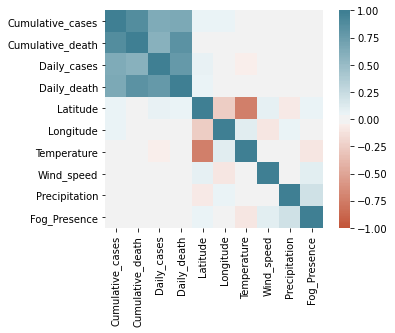

In [15]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

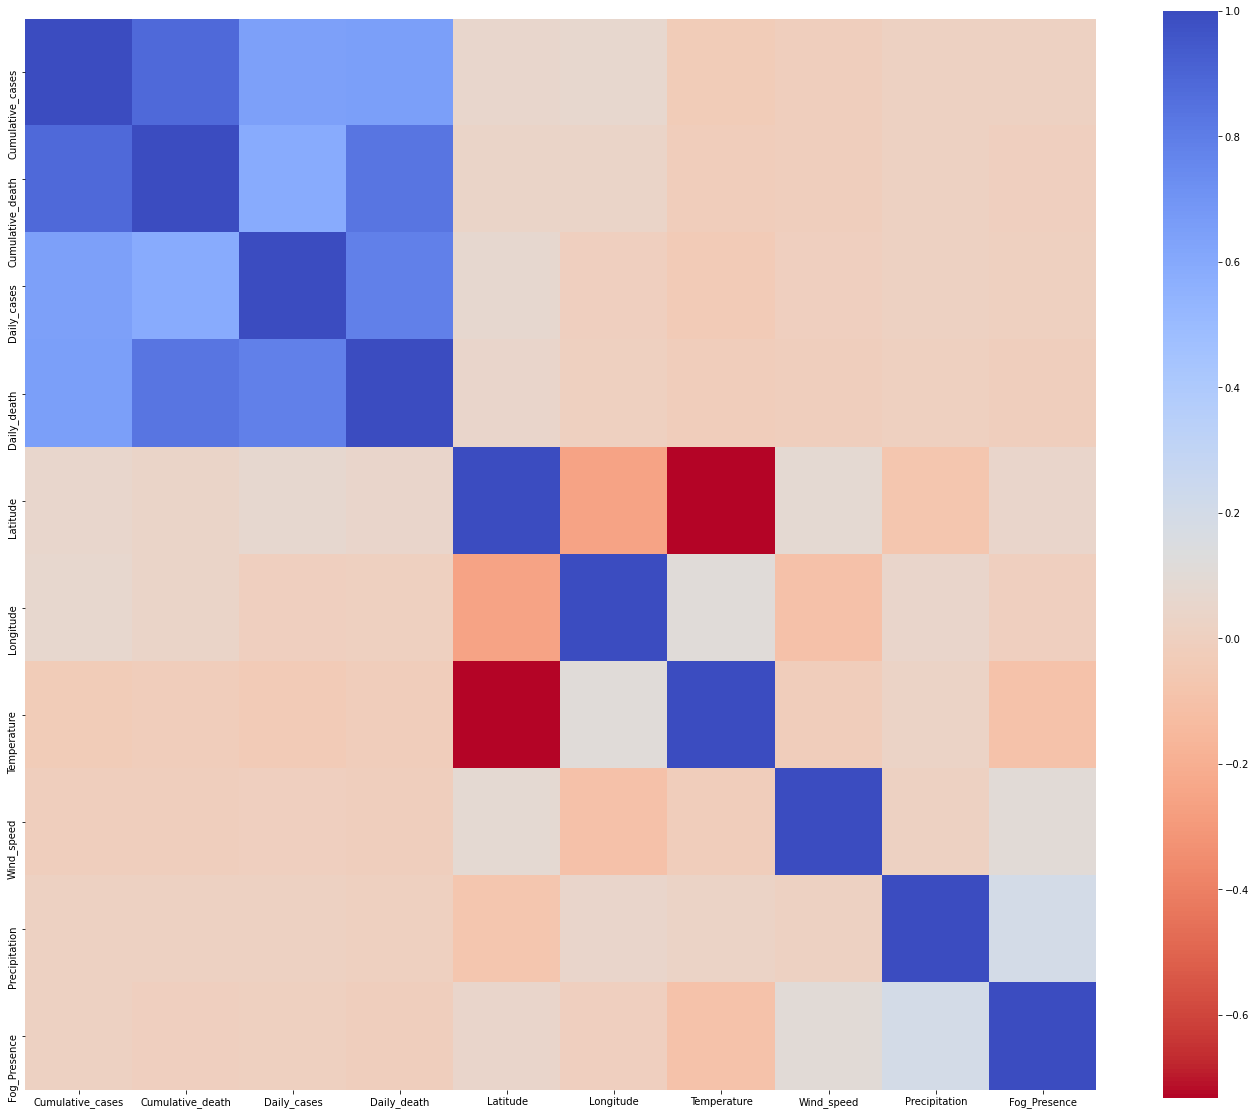

In [16]:

# calculate the correlation matrix
corr = df.corr()
f, ax2 = plt.subplots(1, figsize=(24,20))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2,
        square=True)

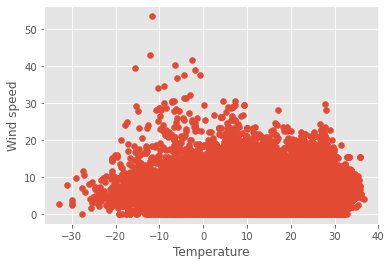

In [17]:
matplotlib.style.use('ggplot')

plt.scatter(df.Temperature, df.Wind_speed)
plt.xlabel("Temperature")
plt.ylabel("Wind speed")
plt.show()

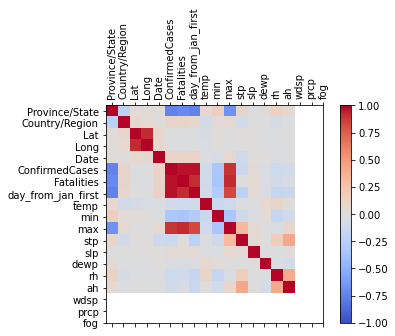

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\weather_week1.csv", index_col=0)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [2]:
#This is the second dataset with information such as temperature,minimum and maximum temperature as well as the mean
#mean station pressure,mean see level pressure,absolute humidity,relative humidity,
#mean dew point,mean wind speed,precipitation and fog

In [20]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\weather_week1.csv")
df = data.copy()

In [21]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


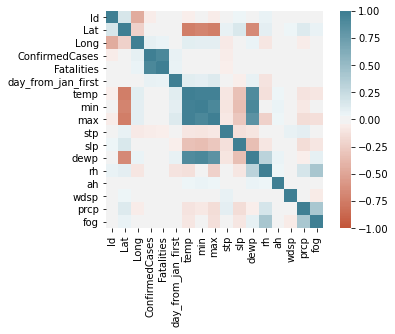

In [22]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

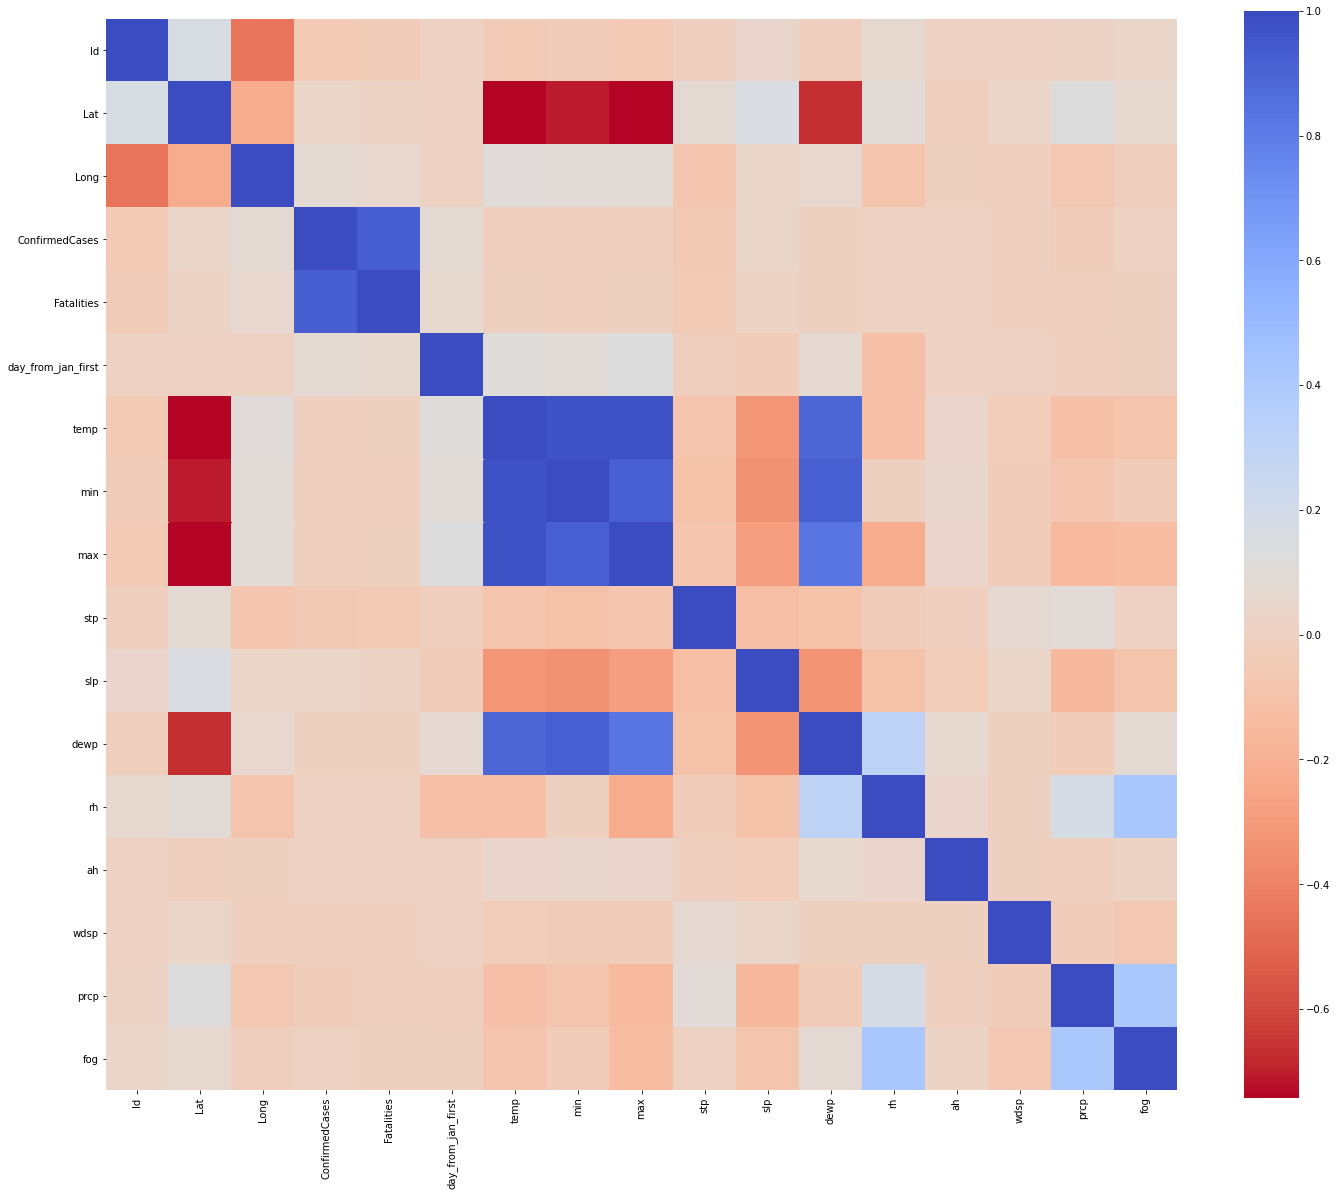

In [23]:
# calculate the correlation matrix
corr = df.corr()
f, ax2 = plt.subplots(1, figsize=(24,20))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2,
        square=True)

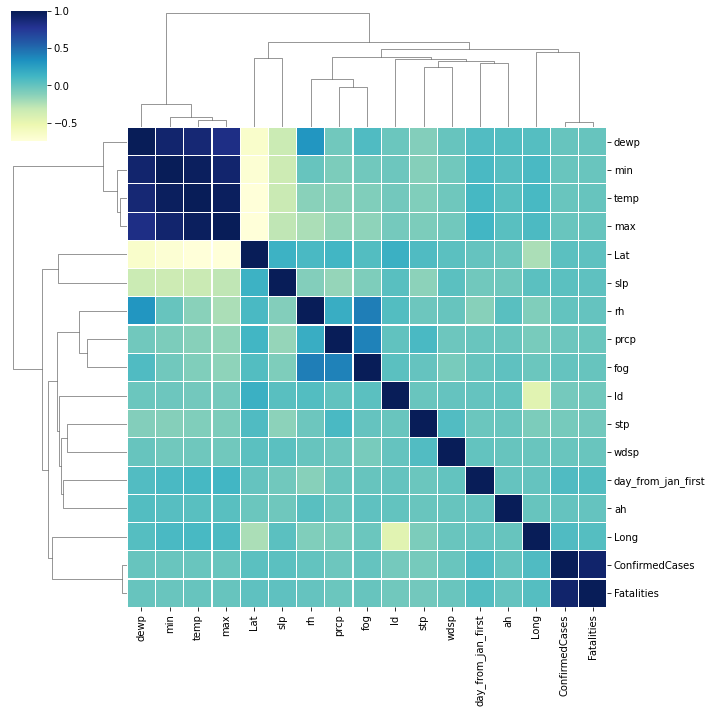

In [24]:

corrmat = data.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

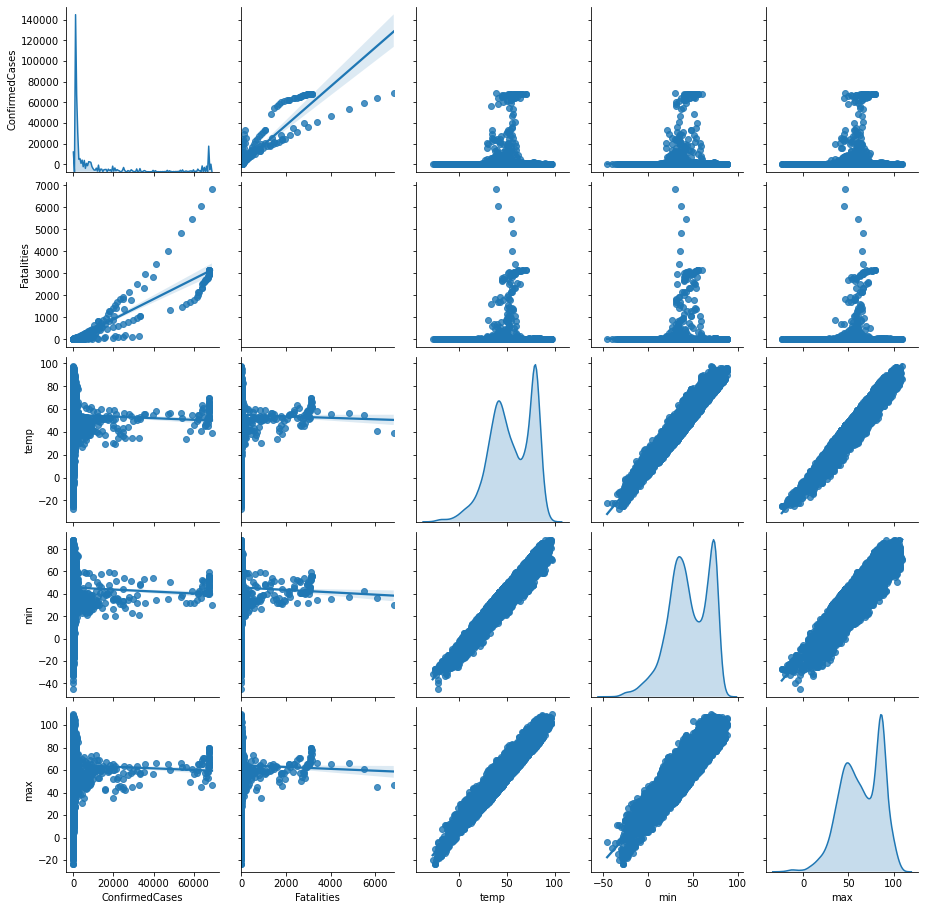

In [33]:
sns.pairplot(df, diag_kind="kde", kind="reg", vars=['ConfirmedCases','Fatalities','temp','min','max'])

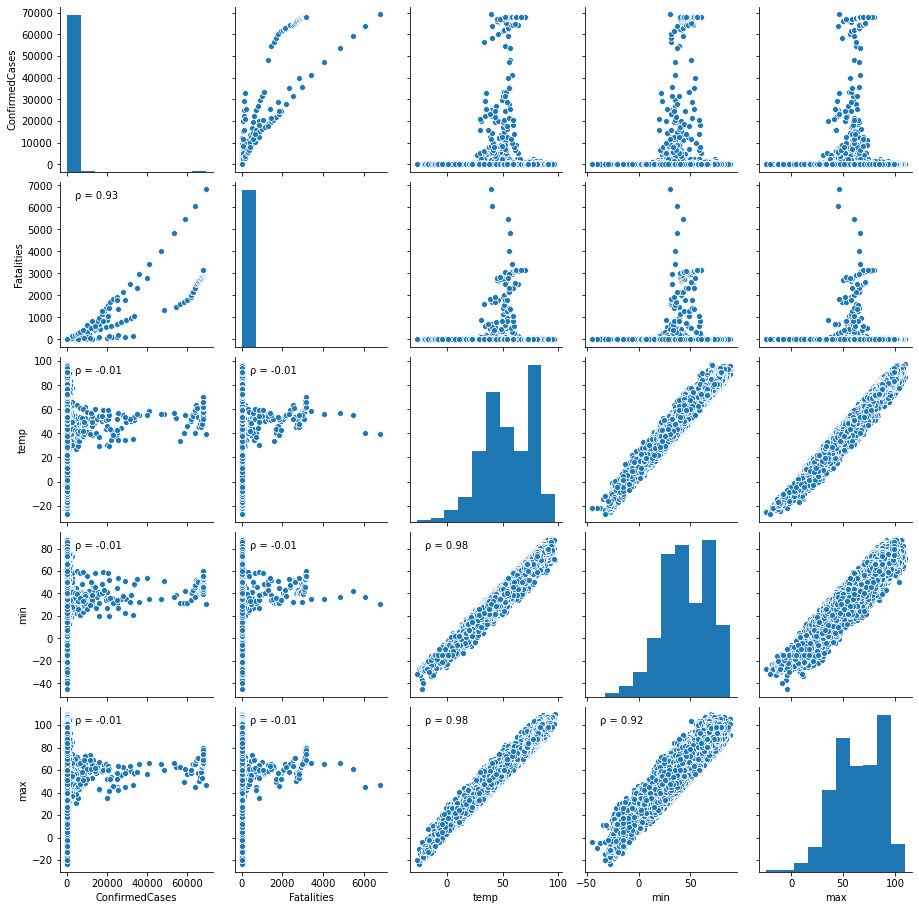

In [30]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df, vars=['ConfirmedCases','Fatalities','temp','min','max'])
g.map_lower(corrfunc)
plt.show()

In [31]:
#,'stp','slp','dewp','rh','ah','wdsp','prcp','fog'

In [3]:
#Thind dataset i found with extra information about the conditions of patients

In [15]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\Afghanistan.csv")                       
df = data.copy()

In [16]:
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Median Age (Years),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33,65,5.89,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33,65,5.56,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33,65,4.50,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33,65,7.78,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33,65,6.00,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported


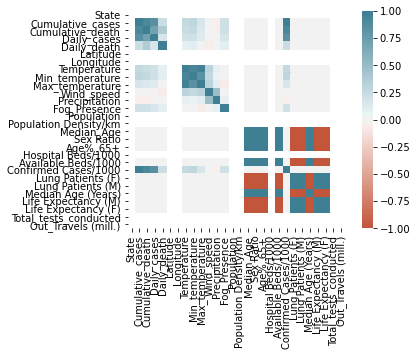

In [17]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

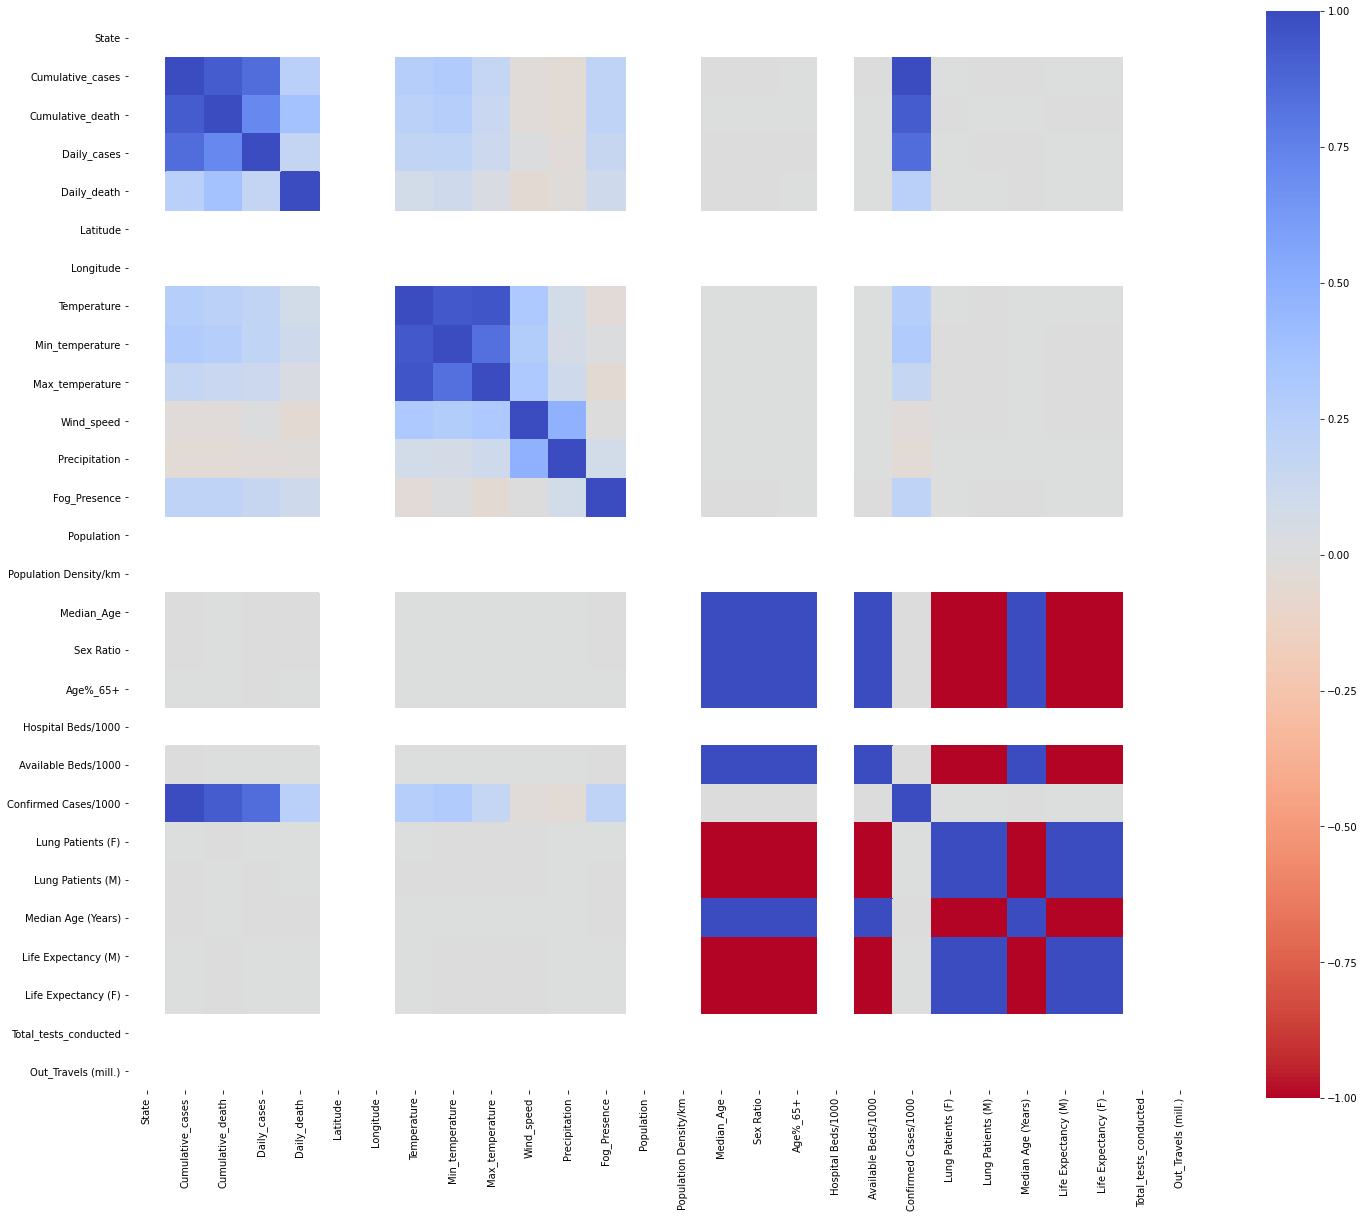

In [18]:
# calculate the correlation matrix
corr = df.corr()
f, ax2 = plt.subplots(1, figsize=(24,20))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2,
        square=True)